In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5583,2657-ALMWY,Female,1,Yes,No,26,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,84.95,2169.75,Yes
5288,8058-INTPH,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.65,79.65,Yes
6081,8757-TFHHJ,Male,0,No,No,1,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.80,49.8,No
2551,2882-DDZPG,Female,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.45,227.45,No
2431,8263-JQAIK,Male,1,No,No,2,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.45,47.5,Yes


In [ ]:
df.drop('customerID',axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df1 = df[df.TotalCharges!=' ']

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Alper\AppData\Local\Temp\ipykernel_15664\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [ ]:
df1.TotalCharges.dtypes

dtype('float64')

In [ ]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

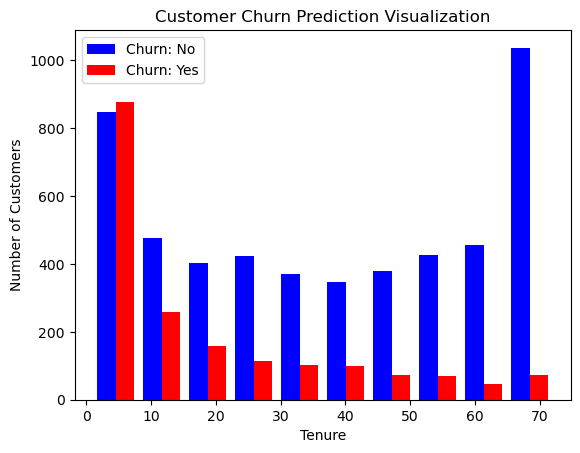

In [ ]:
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_no,tenure_churn_yes],color=['blue','red'],label=['Churn: No','Churn: Yes'])
plt.legend()

In [ ]:
def print_unique_v(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')
print_unique_v(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Alper\AppData\Local\Temp\ipykernel_15664\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Alper\AppData\Local\Temp\ipykernel_15664\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [ ]:
print_unique_v(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [ ]:
df1.replace({'Yes' : 1 , 'No' : 0},inplace=True)

C:\Users\Alper\AppData\Local\Temp\ipykernel_15664\142403626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'Yes' : 1 , 'No' : 0},inplace=True)


In [ ]:
print_unique_v(df1)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
df1['gender'].replace({'Female' : 1 , 'Male' : 0}, inplace=True)

C:\Users\Alper\AppData\Local\Temp\ipykernel_15664\2489128149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female' : 1 , 'Male' : 0}, inplace=True)


In [ ]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [ ]:
cols_toScale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_toScale] = scaler.fit_transform(df2[cols_toScale])

In [ ]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3167,1,0,1,0,0.887324,1,0,1,1,1,...,0,1,0,0,0,1,0,0,0,1
3958,0,0,1,0,0.211268,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
5349,0,0,1,1,0.957746,1,1,1,1,1,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
X= df2.drop('Churn',axis='columns')
y= df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
import tensorflow as tf
from tensorflow import keras
model= keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5203 - accuracy: 0.7257
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7940
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8030
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8034
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8101
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4089 - accuracy: 0.8066
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.8094
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8096
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4045 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.8316
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8331
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.8311
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.8341
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3576 - accuracy: 0.8324
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.8336
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3576 - accuracy: 0.8341
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3564 - accuracy: 0.8315
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3566 - accuracy: 0.8329
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 

In [ ]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.7719


[0.5005519390106201, 0.7718549966812134]

In [ ]:
yp = model.predict(X_test)
yp[:5]
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

44/44 [==============================] - 0s 965us/step
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       999
           1       0.67      0.42      0.52       408

    accuracy                           0.77      1407
   macro avg       0.73      0.67      0.68      1407
weighted avg       0.76      0.77      0.75      1407



Text(95.72222222222221, 0.5, 'Truth')

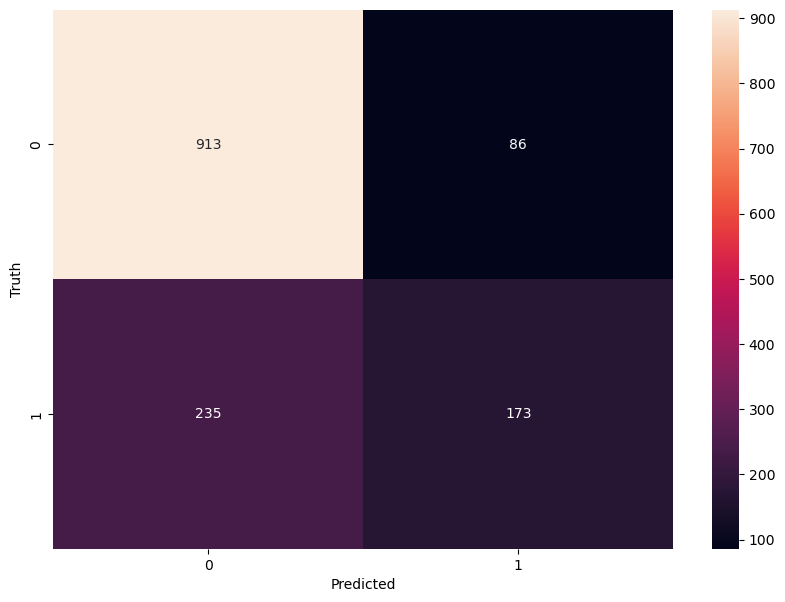

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
count_c_0, count_c_1 = df1.Churn.value_counts()
df_c_0=df2[df2['Churn']==0]
df_c_1=df2[df2['Churn']==1]
df_c_0.shape

(5163, 27)

In [ ]:
df_c_1.shape

(1869, 27)

In [ ]:
df_c_0_under = df_c_0.sample(1869)
df_test_under = pd.concat([df_c_0_under,df_c_1], axis=0)
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [ ]:
X=df_test_under.drop('Churn',axis=1)
y=df_test_under['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2, random_state=15, stratify=y)
#stratify equalizes amount of outputs
model2= keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6670 - accuracy: 0.5967
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5504 - accuracy: 0.7294
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.7572
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.7686
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7749
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.7783
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7793
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7766
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.7793
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.7843
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8094
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.8060
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8077
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8100
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8100
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8064
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8107
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8040
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8144
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8100
Epoch 93/100


In [ ]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 0s 1ms/step - loss: 0.5599 - accuracy: 0.7152


[0.5598846077919006, 0.7152406573295593]

In [ ]:
yp = model2.predict(X_test)
yp[:5]
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

24/24 [==============================] - 0s 878us/step
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       374
           1       0.75      0.75      0.75       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748

